In [2]:
import os
import shapefile
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def get_all_points_info(shp_path):
    ps = shapefile.Reader(shp_path)
    temp_list = []
    points_num = len(ps)
    for i in range(points_num):
        lon_lat = list(ps.shape(i).points[0])
        deformation = ps.record(i)[17:]
        coherence = ps.record(i)[1:2]
        mean_velocity = ps.record(i)[0:1]
        one_point_info = lon_lat + mean_velocity + coherence + deformation
        temp_list.append(one_point_info)
    all_points_info = np.array(temp_list)
    # print(all_points_info.shape)
    num = np.arange(0, points_num).reshape((-1, 1))
    all_points_info = np.concatenate([num, all_points_info], axis=1)
    # print(all_points_info.shape)
    date = []
    for i in ps.fields[18:]:
        date.append(i[0][2:])
    return all_points_info, date


def save_mean_vel(all_points_info, save_path):
    num = all_points_info[:, 0].reshape((-1, 1))
    lon = all_points_info[:, 1]
    lon = (lon - 0.000366).reshape((-1, 1))
    lat = all_points_info[:, 2].reshape((-1, 1))
    vel = all_points_info[:, 3].reshape((-1, 1))
    coh = all_points_info[:, 4].reshape((-1, 1))
    save_info = np.concatenate([num, lon, lat, vel, coh], axis=1)
    np.savetxt(save_path, save_info, fmt='%4f')


def plot_point_disp_in_one(cum_disp, date, num_list):
    cum_disp = np.asarray(cum_disp, dtype=np.float16)
    point_disp = []
    plt.figure(figsize=(18, 6))
    for num in num_list:
        if num >= cum_disp.shape[0] or num < 0:
            print('Error: cannot find point {}\n'.format(num))
        else:
            line = cum_disp[num, 5:]
            point_disp.append(list(line))
            plt.plot(date, line, label=str(num))
            plt.grid(True)
            plt.xticks(rotation=40)
            plt.ylim([-40, 20])
            plt.legend()
            plt.title('Point displacement')
            plt.xlabel('date', fontsize=14)
            plt.ylabel('cumulative displacement (mm)', fontsize=14)
    # plt.savefig('cum_disp.png', dpi=300)
    plt.show()
    # for i in point_disp:
    #     print('{}\n'.format(i))

In [4]:
shp_path1 = r"C:\thorly\Files\landslide\1_origin_geocoding\1_PS_60_0.shp"
# 读取数据
points_info1, date = get_all_points_info(shp_path1)

shp_path2 = r"C:\thorly\Files\landslide\1_PS_processing\geocoding\1_PS_60_0.shp"
# 读取数据
points_info2, date = get_all_points_info(shp_path2)

In [5]:
# 保存平均速率
# save_path = os.path.basename(shp_path)[:-4] + "2.txt"
save_path1 = os.path.join(r'C:\thorly\Files\landslide\1_PS_processing', "1_PS_processing_vel.txt")
# save_mean_vel(points_info1, save_path1)

save_path2 = os.path.join(r'C:\thorly\Files\landslide\1_PS_processing', "1_PS_processing_vel.txt")
save_mean_vel(points_info2, save_path2)

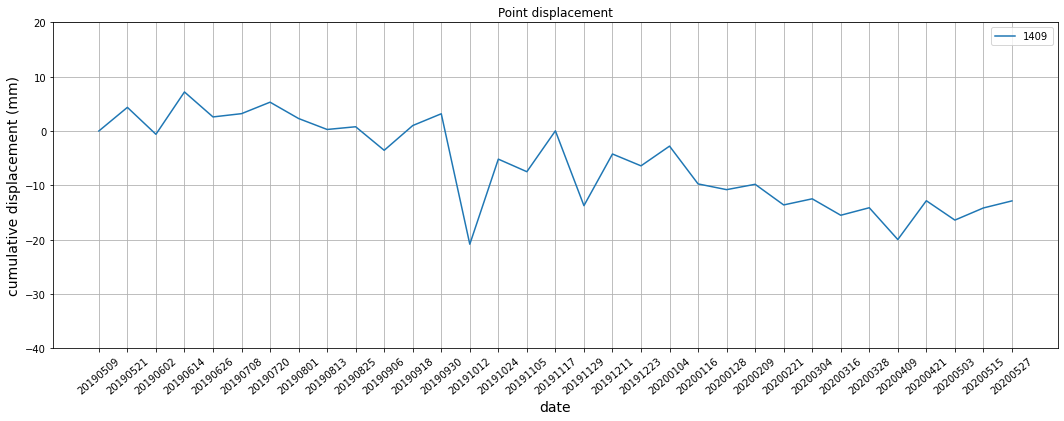

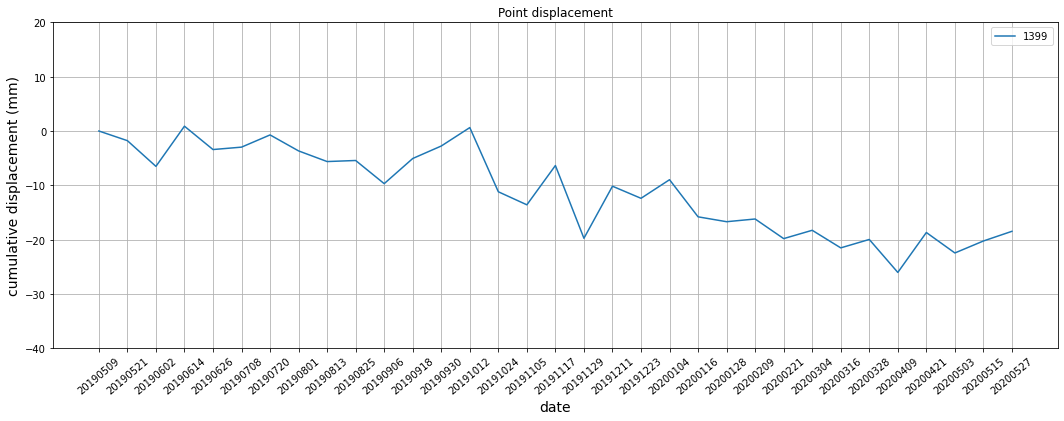

In [6]:
# 绘制累计形变图
num_list1 = [1409]
plot_point_disp_in_one(points_info1, date, num_list1)

num_list2 = [1399]
plot_point_disp_in_one(points_info2, date, num_list2)